# Predvidjanje stepena opasnosti kod masina

## Sadrzaj ispod mozete koristiti za navigaciju kroz rad 
- [1. Exploratoty Data Analysis](#1.)
  - [1.1 Explore correlation](#1-1.)
- [2. Data Preprocessing](#2.)
  - [2.1. Uzrok mising](#2-1.)
- [3. Classification: Predvidjanje stepena opasnosti](#3.)
  - [ 3.1 Objasnjenje tabele](#3-1.) 
- [ 4. Random Forest](#4.)
- [5. Vizuelni prikaz rezultata](#5.) 
  - [5.1 ROC_AUC grafik](#5-1.) 
  - [5.2 Confusion matrix](#5-2.) 

<a name='1.'></a>
# 1. Exploratoty Data Analysis

In [1]:
import pandas as pd
df = pd.read_excel('D:\Programing projects\Master_rad\data\Podaci_za_sve_masine.xlsx')

In [4]:
import matplotlib.pylab as plt
import seaborn as sns
from pylab import rcParams
from pandas.plotting import register_matplotlib_converters

#Set some plotting options
pd.set_option('display.max_columns',20)
sns.set(style='whitegrid', palette='muted', font_scale=1.2)

HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#93D30C", "#8F00FF"]

sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))

rcParams['figure.figsize'] = 14, 10
register_matplotlib_converters



#Set some Pandas options
pd.set_option('max_colwidth', 40)
pd.options.display.max_columns = None  # Possible to limit
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [254]:
#Understanding my data
print('Shape of my data: {}'.format(df.shape))
print('\n')
print('Columns in data: {}'.format(df.columns.to_list()))
print('\n')
df.head(5)

Shape of my data: (9362, 16)


Columns in data: ['Rbr', 'Dan', 'Datum', 'Masina', 'MOTORNI SAT', 'RAD', 'VRSTA MASINE', 'Vreme', 'Uzrok', 'Tehnoloski', 'Elektro/struja', 'Mehanicki', 'Zloupotreba', 'Organizacioni', 'Eksterni uticaj', 'Nor stepen opasnosti']




,Rbr,Dan,Datum,Masina,MOTORNI SAT,RAD,VRSTA MASINE,Vreme,Uzrok,Tehnoloski,Elektro/struja,Mehanicki,Zloupotreba,Organizacioni,Eksterni uticaj,Nor stepen opasnosti
0,10562,NaN,NaN,NaN,NaN,reduktor mehanizma dizanja/lom zuba,KRAN,600,reduktor mehanizma dizanja/lom zuba,NaN,NaN,600.0,600.0,NaN,NaN,5
1,10563,NaN,NaN,NaN,NaN,reduktor mehanizma dizanja/lom zuba,KRAN,600,reduktor mehanizma dizanja/lom zuba,NaN,NaN,600.0,600.0,NaN,NaN,5
2,10564,NaN,NaN,NaN,NaN,reduktor mehanizma dizanja/lom zuba,KRAN,600,reduktor mehanizma dizanja/lom zuba,NaN,NaN,600.0,600.0,NaN,NaN,5
3,10565,NaN,NaN,NaN,NaN,reduktor mehanizma dizanja/lom zuba,KRAN,600,reduktor mehanizma dizanja/lom zuba,NaN,NaN,600.0,600.0,NaN,NaN,5
4,10566,NaN,NaN,NaN,NaN,reduktor mehanizma dizanja/lom zuba,KRAN,600,reduktor mehanizma dizanja/lom zuba,NaN,NaN,600.0,600.0,NaN,NaN,5


2    4220
3    2980
1    1229
4     663
5     270
Name: Nor stepen opasnosti, dtype: int64


<AxesSubplot:>

Text(0.5, 1.0, 'Nor stepen opasnosti')

Text(0, 0.5, 'Broj')

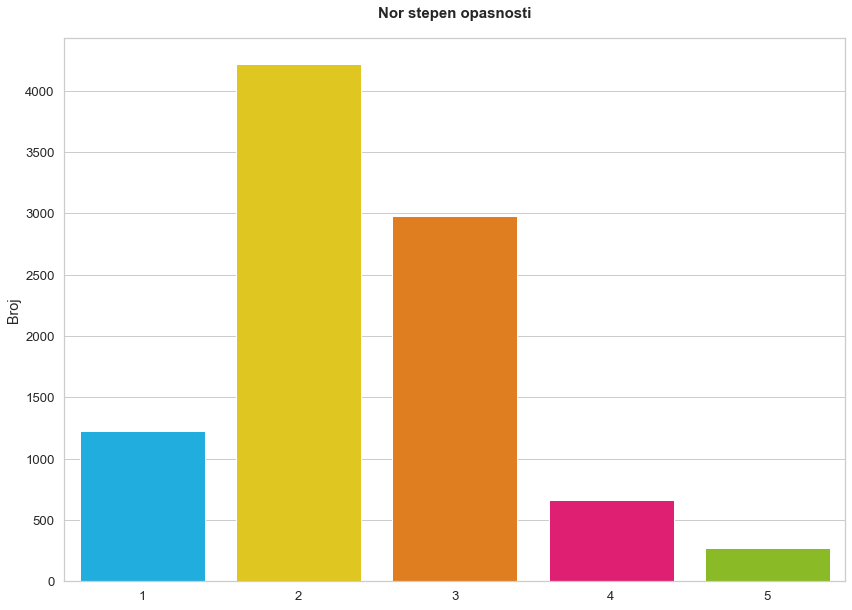

In [255]:
target_dist = df['Nor stepen opasnosti'].value_counts()
print(target_dist)


# Visualize 
sns.barplot(x=target_dist.index, y=target_dist.values)
plt.title('Nor stepen opasnosti', pad=20, fontsize=15, fontweight='bold')
plt.ylabel('Broj')

                      Count  Percentage
Rbr                       0        0.00
Dan                    1091       11.65
Datum                  1067       11.40
Masina                 1079       11.53
MOTORNI SAT            8958       95.68
RAD                       0        0.00
VRSTA MASINE              0        0.00
Vreme                     0        0.00
Uzrok                  4197       44.83
Tehnoloski             6173       65.94
Elektro/struja         8656       92.46
Mehanicki              7060       75.41
Zloupotreba            9103       97.23
Organizacioni          8667       92.58
Eksterni uticaj        9288       99.21
Nor stepen opasnosti      0        0.00


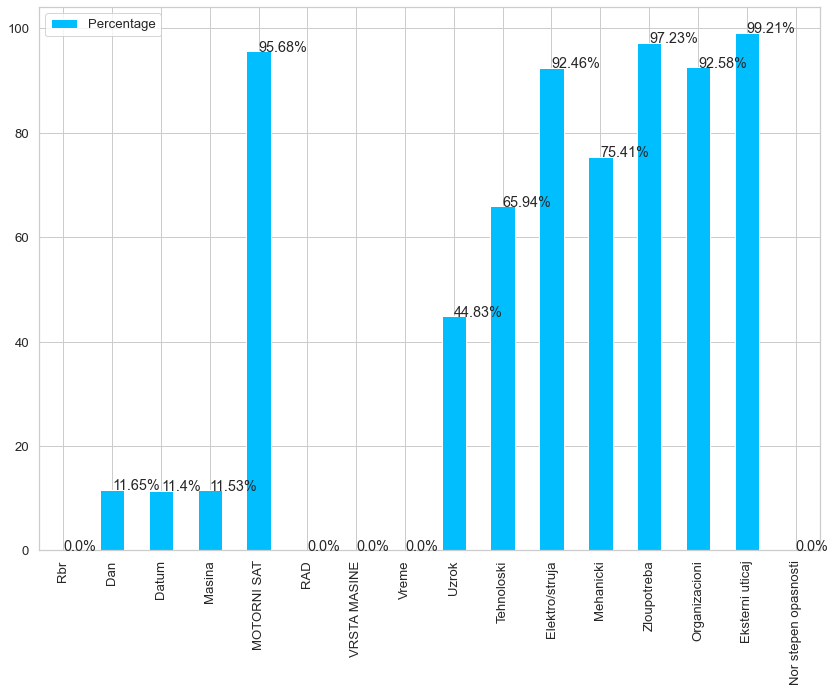

In [256]:
#Explore Missing Values

def check_for_missing_values(df, plot=True):
    '''
    Checks for percentage of missing values by column names
    
    Args:
        df (dataframe): dataframe. 
      
    Returns:
        Plot for percentage of missing values by column
        df with information about missing data by column
    '''
    if sum(list(df.isnull().sum())) == 0:
        return print('No missing values')
    else:
        #retunrs number of missing data by collumn, percentage of NaN data, plot
        missing_count = df.isnull().sum()
        missing_values = df.isnull().count()
        missing_percentige = round(missing_count/missing_values*100, 2)
        missing_df = pd.DataFrame({'Count':missing_count, 'Percentage':missing_percentige})
        
        #plotting
        if plot == True:
            barchart = missing_df.plot.bar(y='Percentage')
            for index, percentage in enumerate(missing_percentige):
                barchart.text(index, percentage, str(percentage )+ '%')

        return print(missing_df)
    
check_for_missing_values(df, plot= True)

array([[<AxesSubplot:title={'center':'Rbr'}>,
        <AxesSubplot:title={'center':'Dan'}>,
        <AxesSubplot:title={'center':'Vreme'}>],
       [<AxesSubplot:title={'center':'Tehnoloski'}>,
        <AxesSubplot:title={'center':'Elektro/struja'}>,
        <AxesSubplot:title={'center':'Mehanicki'}>],
       [<AxesSubplot:title={'center':'Zloupotreba'}>,
        <AxesSubplot:title={'center':'Organizacioni'}>,
        <AxesSubplot:title={'center':'Eksterni uticaj'}>],
       [<AxesSubplot:title={'center':'Nor stepen opasnosti'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

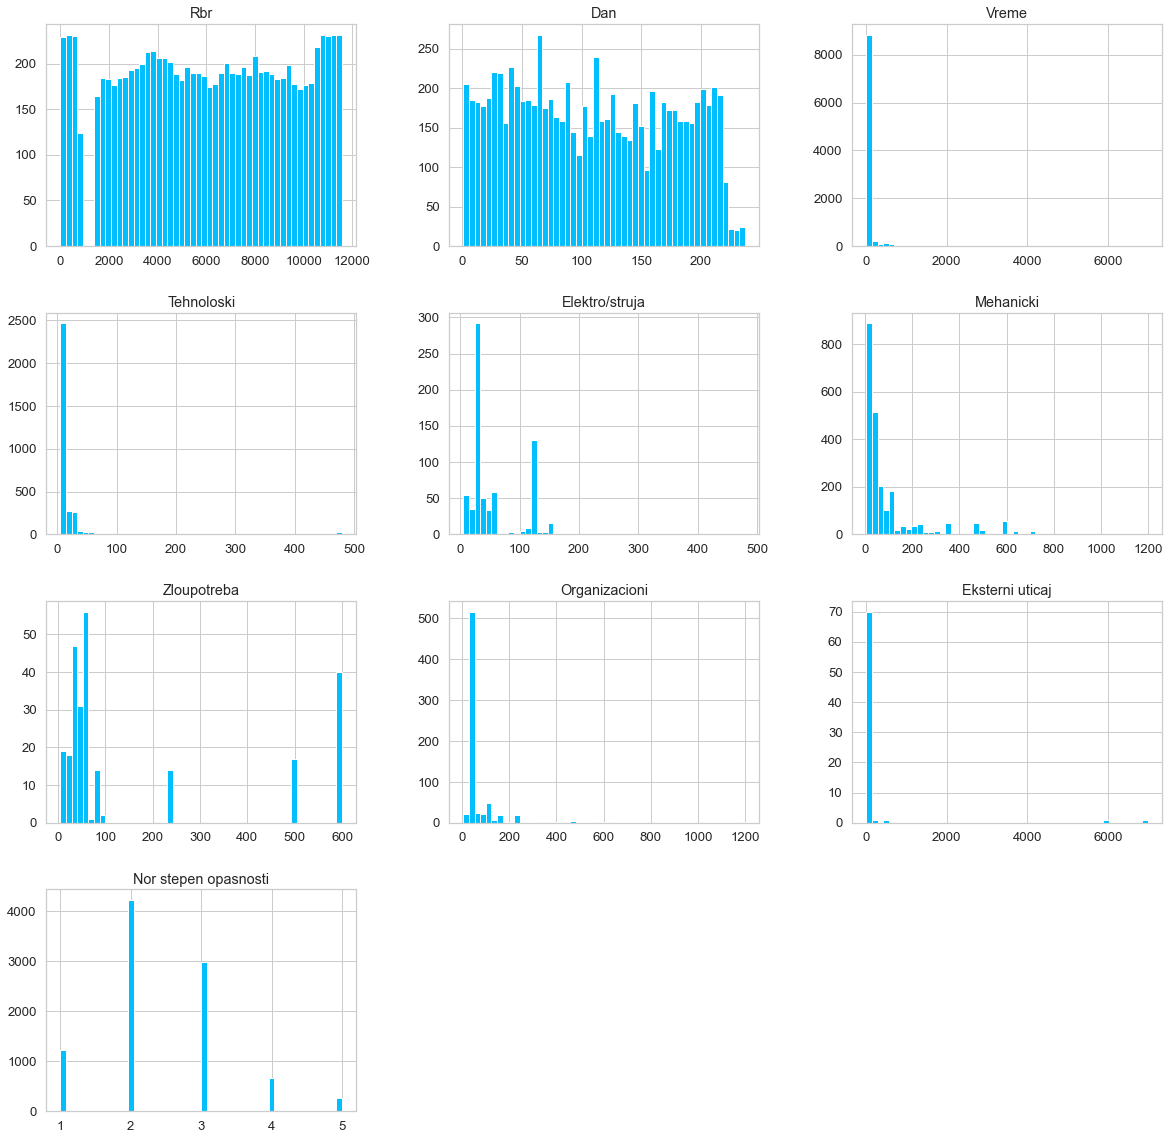

In [257]:
#Vizualize histograms 
df.hist(bins=50,figsize=(20,20),color="#01BEFE")

<a name='1-1.'></a>
## 1.1 Explore correlation

<AxesSubplot:>

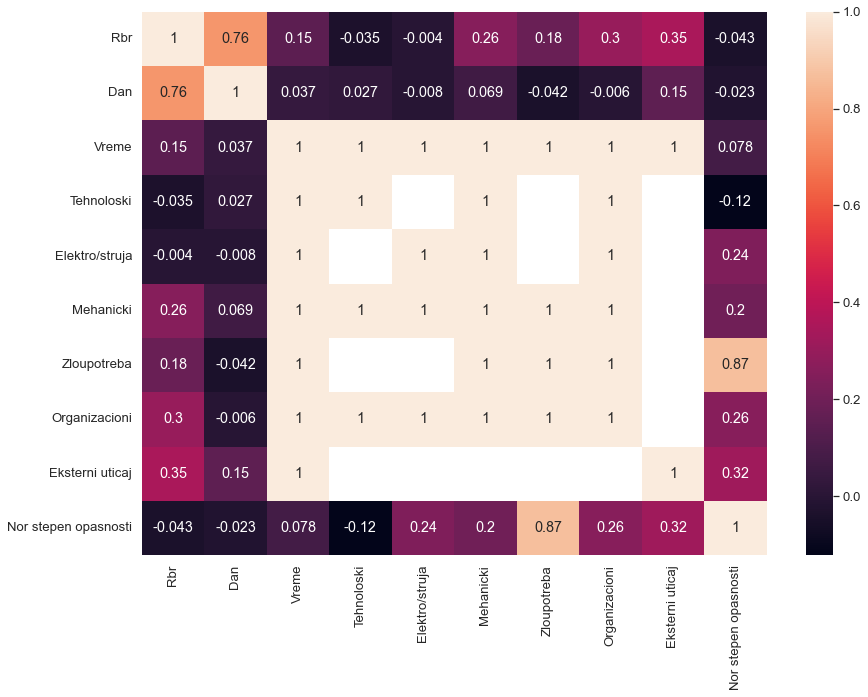

In [258]:
corr_matrix = df.corr()
sns.heatmap(data=df.corr().round(3), annot=True)

In [259]:
# # Vodi racuna! Ovde pretvaras kolone u category, moze da poremeti algoritam posle. U osnovi su: Nor stepen opasnosti = int64
# #                                                                                               RAD = object

# import scipy.stats as ss
# import numpy as np

# #convert columns into categorical dtype
# df['Nor stepen opasnosti'] = df['Nor stepen opasnosti'].astype("category")
# df['RAD'] = df['RAD'].astype("category")

# def cramers_v(x, y):
#     '''
#     Cramers V statistic is method for calculating the correlation of categorical variable
    
#      Args:
#         x : pd.Series. 
#         y : pd.Series. 
      
#     Returns:
#          Cramér’s V score (Categorical correlation) 
#     '''
#     confusion_matrix = pd.crosstab(x,y)
#     chi2 = ss.chi2_contingency(confusion_matrix)[0]
#     n = confusion_matrix.sum().sum()
#     phi2 = chi2/n
#     r,k = confusion_matrix.shape
#     phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
#     rcorr = r-((r-1)**2)/(n-1)
#     kcorr = k-((k-1)**2)/(n-1)
#     return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

# print('Korelacija izmedju Nor stepen opasnosti i RAD je : ', cramers_v( df['Nor stepen opasnosti'], df['RAD']))

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9362 entries, 0 to 9361
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rbr                   9362 non-null   int64  
 1   Dan                   8271 non-null   float64
 2   Datum                 8295 non-null   object 
 3   Masina                8283 non-null   object 
 4   MOTORNI SAT           404 non-null    object 
 5   RAD                   9362 non-null   object 
 6   VRSTA MASINE          9362 non-null   object 
 7   Vreme                 9362 non-null   int64  
 8   Uzrok                 5165 non-null   object 
 9   Tehnoloski            3189 non-null   float64
 10  Elektro/struja        706 non-null    float64
 11  Mehanicki             2302 non-null   float64
 12  Zloupotreba           259 non-null    float64
 13  Organizacioni         695 non-null    float64
 14  Eksterni uticaj       74 non-null     float64
 15  Nor stepen opasnosti 

<a name='2.'></a>
# 2. Data Preprocessing : pripremanje podataka da budu sto pogodniji za ulaz u algoritam

In [261]:
# df = df.loc[905:]

In [34]:
df.columns

Index(['Rbr', 'Dan', 'Datum', 'Masina', 'MOTORNI SAT', 'RAD', 'VRSTA MASINE',
       'Vreme', 'Uzrok', 'Tehnoloski', 'Elektro/struja', 'Mehanicki',
       'Zloupotreba', 'Organizacioni', 'Eksterni uticaj',
       'Nor stepen opasnosti'],
      dtype='object')

In [35]:
#df.drop(['Rbr', 'Dan', 'Datum', 'MOTORNI SAT','Zloupotreba', 'Organizacioni', 'Eksterni uticaj'], axis = 1, inplace = True)

In [36]:
df.drop(['Rbr', 'Dan', 'Datum', 'MOTORNI SAT'], axis = 1, inplace = True)

In [37]:
df[['Tehnoloski', 'Elektro/struja', 'Mehanicki', 'Zloupotreba', 'Organizacioni', 'Eksterni uticaj']].fillna(0)

,Tehnoloski,Elektro/struja,Mehanicki,Zloupotreba,Organizacioni,Eksterni uticaj
0,0.0,0.0,600.0,600.0,0.0,0.0
1,0.0,0.0,600.0,600.0,0.0,0.0
2,0.0,0.0,600.0,600.0,0.0,0.0
3,0.0,0.0,600.0,600.0,0.0,0.0
4,0.0,0.0,600.0,600.0,0.0,0.0
...,...,...,...,...,...,...
9357,0.0,60.0,0.0,0.0,0.0,0.0
9358,0.0,60.0,0.0,0.0,0.0,0.0
9359,0.0,60.0,0.0,0.0,0.0,0.0
9360,0.0,60.0,0.0,0.0,0.0,0.0


In [38]:
df.loc[:, ['Tehnoloski', 'Elektro/struja', 'Mehanicki', 'Zloupotreba', 'Organizacioni', 'Eksterni uticaj']] = df.loc[:, ['Tehnoloski', 'Elektro/struja', 'Mehanicki', 'Zloupotreba', 'Organizacioni', 'Eksterni uticaj']].fillna(0)
df.head()

,Masina,RAD,VRSTA MASINE,Vreme,Uzrok,Tehnoloski,Elektro/struja,Mehanicki,Zloupotreba,Organizacioni,Eksterni uticaj,Nor stepen opasnosti
0,NaN,reduktor mehanizma dizanja/lom zuba,KRAN,600,reduktor mehanizma dizanja/lom zuba,0.0,0.0,600.0,600.0,0.0,0.0,5
1,NaN,reduktor mehanizma dizanja/lom zuba,KRAN,600,reduktor mehanizma dizanja/lom zuba,0.0,0.0,600.0,600.0,0.0,0.0,5
2,NaN,reduktor mehanizma dizanja/lom zuba,KRAN,600,reduktor mehanizma dizanja/lom zuba,0.0,0.0,600.0,600.0,0.0,0.0,5
3,NaN,reduktor mehanizma dizanja/lom zuba,KRAN,600,reduktor mehanizma dizanja/lom zuba,0.0,0.0,600.0,600.0,0.0,0.0,5
4,NaN,reduktor mehanizma dizanja/lom zuba,KRAN,600,reduktor mehanizma dizanja/lom zuba,0.0,0.0,600.0,600.0,0.0,0.0,5


In [39]:
for column in ['Tehnoloski', 'Elektro/struja', 'Mehanicki', 'Zloupotreba', 'Organizacioni', 'Eksterni uticaj']:
    df.loc[df[column] != 0 , column] = 1


In [40]:
for column in df.columns:
    print(f' {column} has missing {sum(df[column].isna())}')

 Masina has missing 1079
 RAD has missing 0
 VRSTA MASINE has missing 0
 Vreme has missing 0
 Uzrok has missing 4197
 Tehnoloski has missing 0
 Elektro/struja has missing 0
 Mehanicki has missing 0
 Zloupotreba has missing 0
 Organizacioni has missing 0
 Eksterni uticaj has missing 0
 Nor stepen opasnosti has missing 0


In [41]:
masine_koje_nedstaju = df[(df.Masina.isna())]
masine_koje_nedstaju

,Masina,RAD,VRSTA MASINE,Vreme,Uzrok,Tehnoloski,Elektro/struja,Mehanicki,Zloupotreba,Organizacioni,Eksterni uticaj,Nor stepen opasnosti
0,NaN,reduktor mehanizma dizanja/lom zuba,KRAN,600,reduktor mehanizma dizanja/lom zuba,0.0,0.0,1.0,1.0,0.0,0.0,5
1,NaN,reduktor mehanizma dizanja/lom zuba,KRAN,600,reduktor mehanizma dizanja/lom zuba,0.0,0.0,1.0,1.0,0.0,0.0,5
2,NaN,reduktor mehanizma dizanja/lom zuba,KRAN,600,reduktor mehanizma dizanja/lom zuba,0.0,0.0,1.0,1.0,0.0,0.0,5
3,NaN,reduktor mehanizma dizanja/lom zuba,KRAN,600,reduktor mehanizma dizanja/lom zuba,0.0,0.0,1.0,1.0,0.0,0.0,5
4,NaN,reduktor mehanizma dizanja/lom zuba,KRAN,600,reduktor mehanizma dizanja/lom zuba,0.0,0.0,1.0,1.0,0.0,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...
9357,NaN,ventilator motora za dizanje,KRAN,60,ventilator motora za dizanje,0.0,1.0,0.0,0.0,0.0,0.0,1
9358,NaN,ventilator motora za dizanje,KRAN,60,ventilator motora za dizanje,0.0,1.0,0.0,0.0,0.0,0.0,1
9359,NaN,ventilator motora za dizanje,KRAN,60,ventilator motora za dizanje,0.0,1.0,0.0,0.0,0.0,0.0,1
9360,NaN,ventilator motora za dizanje,KRAN,60,ventilator motora za dizanje,0.0,1.0,0.0,0.0,0.0,0.0,1


In [42]:
masine_koje_nedstaju['Uzrok'].value_counts()

isključivač pogona vožnje krana                  176
isključivač krajnjeg položaja mačke              165
osigurač kuke                                     97
kočnica motora za dizanje                         70
vodjica užeta mehanizma dizanja                   56
kontaktor glavnog elektroormana krana             53
ležište vratila                                   42
namotaji motora za dizanje tereta                 40
reduktor mehanizma dizanja/lom zuba               29
uredjaj za preopterećenje krana/mikroprekidač     28
ležište točka mehanizma za pogon vožnje mačke     28
ležište doboša mehanizma za dizanje               28
ležišta koturova koturača                         15
obod točka kolica za vožnju krana                 14
osigurači glavnog elektroormana krana             14
obod točka kolica za vožnju mačke                 14
motor za vožnju mačke                             14
motor mehanizma pogona vožnje krana               14
ležište kuke na traverzi                      

In [43]:
# primetio sam da za svaki NaN u koloni Masina, VRSTA MASINE je KRAN tako da popunjavamo missing sa kran
df.loc[df['Masina'].isna(), 'Masina'] = 'kran'

<a name='2-1.'></a>
## 2.1 Moramo nekako da resimo problem sa tim sto je pola informacija za Uzrok mising
 Opcija: groupby('RAD) i fillna()


In [44]:
df[(df.Uzrok.isna())].shape

(4197, 12)

In [45]:
def funk(group):
    group = group.fillna(method="ffill")
    group = group.fillna(method="bfill")
    return group

df = df.groupby('RAD').apply(lambda group: funk(group))

In [46]:
sum(df.Uzrok.isna())

4187

In [47]:
def funkcija_strip(x):
    if type(x) == str:
        x.strip()
    return x

In [48]:
for column in ['Masina', 'RAD', 'VRSTA MASINE', 'Uzrok']:
    df[column] = df[column].str.lower()
    df[column] = df[column].apply(lambda x: funkcija_strip(x))

In [49]:
lose_vrednosti = df[df.Uzrok.isna()].RAD.value_counts()[df[df.Uzrok.isna()].RAD.value_counts() < 15].keys()
lose_vrednosti

Index(['стоп уже', 'потезно уже т2', 'iv p.', 'коси ход т1',
       'вађење дрвета из т1', 'чишћење кашике', 'п. пл. ',
       'прекид комуникације', 'израда трасе', 'i рез',
       ...
       'замена конструкције чеоног брисача',
       'раскачивање ролне повратног 1424  ла.',
       'укосио се усмеривач (чланак 227)',
       'гл - замена зуба в1пов - враћање заптивне гуме',
       'постављање жабица на прљавојј т3 и замена ролне на усмеривачу на 01',
       'биметал радног точка', 'израда флеке на прљавој т3',
       'реаговала сајлица на затезном бубњу и одсецање исте',
       'раскочивање носећег слоја ролни', 'вађење дрвета из т4'],
      dtype='object', length=1043)

In [50]:
df = df[~df.RAD.isin(lose_vrednosti)]

In [51]:
df.Uzrok.fillna('RAD', inplace = True)

### Popunili smo sve missing u koloni Uzrok sa vrednostima iz kolone RAD, a uklonili sve redove cije se vrednosti u koloni RAD pojavljuju manje od 15 puta

In [52]:
df[df.RAD == 'i р.'].Vreme.value_counts() # za neke uzroke je vecina vremena zastoja 0 

0      578
115      1
5        1
Name: Vreme, dtype: int64

# Potrebno je napraviti promene u podacima!

In [53]:
# RESEN PROBLEM LATINICE I CIRILICE
import cyrtranslit

df['RAD']=df['RAD'].apply(lambda RAD: cyrtranslit.to_latin(RAD) if (type(RAD)==str) else RAD)

In [54]:
# ovde mora da se popravi cirilica!!! 
# Takodje je potrebno da se spoje iste kategorije
df.RAD.value_counts().head(50)

promena reza                                     1717
i r.                                              580
ii r.                                             555
pl.                                               538
pauza                                             506
iii r.                                            447
isključivač pogona vožnje krana                   176
isključivač krajnjeg položaja mačke               165
promena reza                                      163
p. pl.                                            128
iv r.                                             105
osigurač kuke                                      97
ulje u motoru                                      85
zagušenje centralnog levka                         78
odsecanje sajlice                                  73
kočnica motora za dizanje                          70
vodjica užeta mehanizma dizanja                    56
kontaktor glavnog elektroormana krana              53
filteri ulja                

In [55]:
# pogledati
df.Masina.value_counts()

rotorni bager                                        5732
kran                                                 1079
buldožer                                               92
ulta                                                   87
kombinirka                                             81
bager kamaco                                           81
damper 2                                               74
damper 1                                               52
bušilica                                               45
damper volvo                                           45
bager volvo                                            33
veliki bager                                           20
ulta volvo                                             18
ulta                                                   14
damper kamaco 1                                        13
bager volvo                                            11
damper 1                                               11
kombinirka    

In [56]:
df['VRSTA MASINE'].value_counts().head(50)

rotorni bager    5732
kran             1091
damper            248
bager             169
utovarivac        128
buldozer           97
kombinirka         90
busilica           47
kompresor           9
Name: VRSTA MASINE, dtype: int64

In [57]:
# RESEN PROBLEM LATINICE I CIRILICE

df['Uzrok']=df['Uzrok'].apply(lambda uzrok: cyrtranslit.to_latin(uzrok) if (type(uzrok)==str) else uzrok)
df.Uzrok = df.Uzrok.str.lower()

In [58]:
df['Uzrok'].value_counts().head(50)

rad                                              2445
promena  reza                                    1930
pl                                                558
pauza                                             506
filter                                            253
ulje                                              206
isključivač pogona vožnje krana                   176
isključivač krajnjeg položaja mačke               165
odsecanje sajlice                                 117
osigurač kuke                                      97
zagušenje centralnog levka                         87
kočnica motora za dizanje                          70
vodjica užeta mehanizma dizanja                    56
kontaktor glavnog elektroormana krana              53
zubi                                               44
ležište vratila                                    42
crevo                                              41
namotaji motora za dizanje tereta                  40
reduktor mehanizma dizanja/l

<a name='3.'></a>
# 3. Classification: Predvidjanje stepena opasnosti

In [59]:
numerical = df['Vreme']

In [60]:
categorical = ['Masina', 'RAD', 'VRSTA MASINE', 'Uzrok', 'Tehnoloski','Elektro/struja', 'Mehanicki',
               'Zloupotreba', 'Organizacioni', 'Eksterni uticaj']

In [61]:
from sklearn.preprocessing import OneHotEncoder

# Apply one-hot encoder to the relevant columns
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(df[categorical]))

# Replace default column names with more descriptive ones
OH_cols.columns = OH_encoder.get_feature_names(categorical)

# One-hot encoding removed index; put it back
OH_cols.index = df.index

OH_cols.shape

(7611, 813)

In [289]:
import pickle

pickle_encder = open('encder_15_5_2022.pkl', 'wb')
pickle.dump(OH_encoder, pickle_encder)
pickle_encder.close()

In [62]:
from sklearn.preprocessing import StandardScaler

numerical = numerical.values
scaler = StandardScaler()
num_scaled = scaler.fit_transform(numerical.reshape(-1, 1))
num_scaled = pd.DataFrame(num_scaled)
num_scaled

,0
0,3.837859
1,3.837859
2,3.837859
3,3.837859
4,3.837859
...,...
7606,0.153709
7607,0.153709
7608,0.153709
7609,0.153709


In [292]:
# pickle za StandardScaler
import pickle

pickle_scaler = open('StandardScaler_15_5_2022.pkl', 'wb')
pickle.dump(scaler, pickle_scaler)
pickle_scaler.close()

In [293]:
num_scaled.isna().value_counts()

False    7611
dtype: int64

In [63]:
# We need to reset index so that there is no Nan values when we add num to cat
num_scaled = num_scaled.reset_index(drop=True)
OH_cols = OH_cols.reset_index(drop=True)

In [64]:
OH_cols.join(num_scaled)

,Masina_bager,Masina_bager kamaco,Masina_bager kamaco 1,Masina_bager mali,Masina_bager veliki,Masina_bager volvo,Masina_bager volvo,Masina_bager volvo mali,Masina_bager zglobni,Masina_buldožer,...,Elektro/struja_1.0,Mehanicki_0.0,Mehanicki_1.0,Zloupotreba_0.0,Zloupotreba_1.0,Organizacioni_0.0,Organizacioni_1.0,Eksterni uticaj_0.0,Eksterni uticaj_1.0,0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,3.837859
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,3.837859
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,3.837859
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,3.837859
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,3.837859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7606,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.153709
7607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.153709
7608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.153709
7609,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.153709


In [32]:
OH_cols['Vreme'] = num_scaled
OH_cols['Vreme'].isna()

0       False
1       False
2       False
3       False
4       False
        ...  
7606    False
7607    False
7608    False
7609    False
7610    False
Name: Vreme, Length: 7611, dtype: bool

In [296]:
X = OH_cols
y = df['Nor stepen opasnosti']
X

,Masina_bager,Masina_bager kamaco,Masina_bager kamaco 1,Masina_bager mali,Masina_bager veliki,Masina_bager volvo,Masina_bager volvo,Masina_bager volvo mali,Masina_bager zglobni,Masina_buldožer,Masina_buldožer,Masina_bušilica,Masina_bušilica,Masina_damer 2,Masina_damper,Masina_damper 1,Masina_damper 1,Masina_damper 2,Masina_damper 2,Masina_damper kamaco 1,Masina_damper kamaco 2,Masina_damper kamacu 2,Masina_damper kamacy,Masina_damper volovo,Masina_damper volvo,Masina_damper volvo,Masina_damper zglobni,Masina_damper zglobni,Masina_dvogredni mosni kran nosivost 10 t raspon 29m,Masina_dvogredni mosni kran nosivost 16 t raspon 27m,Masina_dvogredni mosni kran nosivost 20 t raspon 16.7m,Masina_dvogredni mosni kran nosivost 20 t raspon 22.5m,Masina_dvogredni mosni kran nosivost 32 t raspon 24m,Masina_jednogredni mosni kran nosivost 10 t raspon 22.5m,Masina_jednogredni mosni kran nosivost 5 t raspon 29m,Masina_kamaco damper 1,Masina_kamaco damper 2,Masina_kamacu damper 1,Masina_kombinikra,Masina_kombinirka,Masina_kombinirka,Masina_kompresor,Masina_kompresor xas571,Masina_kran,Masina_mali bager,Masina_portalni kran nosivost 63 t raspon 18m,Masina_rečna dizalica 160 t,Masina_rotorni bager,Masina_ulta,Masina_ulta,Masina_ulta 2,Masina_ulta volvo,Masina_utovana volovo,Masina_utovarna,Masina_utovarna volvo,Masina_veliki bager,Masina_volvo bager,Masina_volvo damper,Masina_zglobni damper,RAD_1 osigurač,RAD_10l hidrola,RAD_10l hidrola ulja,RAD_10šrafova na papučici,RAD_120l ulja hidrol,RAD_140l hidrola,RAD_15l destilata,RAD_2 creva,RAD_2 mazalice,RAD_20l hidrola,RAD_20l ulja hidrola,RAD_3 creva skinuli da se rade,RAD_3l ulja 15/40 dosuto,RAD_4 zuba male korpe,RAD_40l hidrola 10l 527,RAD_40l hidrola 10w,RAD_48l destilata,RAD_4l motronog ulja,RAD_4l ulja 15/40,RAD_5 šrafa na gusenici i pušta vodu,RAD_50l hidrola,RAD_55l mobiltrans dh10w,RAD_5l ulja,RAD_5l ulja u diferencijal,RAD_8l 424 ilje diferencijal,RAD_9l ulja 15/40 u filter ulje,RAD_agregat veliki ne valjaju baterije,RAD_anlaser,RAD_anlaser spalio četkice 20l hirola kombinirka,RAD_antifirz 20+15,RAD_antifriz,RAD_antifriz 130 l,RAD_baterije i grejanje,RAD_bimetal centralnog levka,RAD_blatarica,RAD_bolcna,RAD_bolcna gume,RAD_bolcna čaure,RAD_bolcno,RAD_bolcno donje od korpe,RAD_bolcno od bolcna urezivali navoje,RAD_bolcno začepilo - skunuto i očišćeno,RAD_bruji ventilator vode,RAD_cervo na titlu,RAD_cilindar,RAD_creva,RAD_creva od grejanja ispucala,RAD_creva od motornog ulja,RAD_creva tražili pušta klima,RAD_crevo,RAD_crevo,RAD_crevo 90l hidrola,RAD_crevo debelo koje ide na pumpu,RAD_crevo do grejanja puklo,RAD_crevo do grejanja puštalo,RAD_crevo do hidraulike,RAD_crevo gornje na hladnjaku puštalo,RAD_crevo na kranu,RAD_crevo od 17-18.30 radio,RAD_crevo od hidraulike na korpama,RAD_crevo od hidrulike,RAD_crevo od hidrulike zamenjeno,RAD_crevo od interkulera,RAD_crevo od kompresora,RAD_crevo od titla,RAD_crevo od titla 30l ulja,RAD_crevo od ulja na filteru,RAD_crevo od vode,RAD_crevo veliko,RAD_crevo za dizanje kašike desno veliko,RAD_crevo za čekić pušta po malo,RAD_curenje noža,RAD_deklo od filtera,RAD_desni točak kočnice,RAD_diferencijal,RAD_diferncijal ulje,RAD_disk pločice,RAD_doduvane gume 4321h,RAD_donja bolcna i čaura,RAD_dosuta voda,RAD_dosuto 10l ulja 15/40,RAD_dosuto 12l u diferncijal,RAD_dosuto 15l ulja 15/40,RAD_dosuto 5l hidrola,RAD_dosuto hidrola 15l,RAD_dosuto u srednju osovinu 8 l ulja pušta semering,RAD_dosuto ulje u diferencijal,RAD_dotegli pumpu od hudraulike,RAD_dotezali daske i krajnice,RAD_dotezani vijci,RAD_dousto 40l hidrola 10w,RAD_dozer grejanje,RAD_dva priključka od centralnog mazanja zavarena,RAD_džojstik,RAD_eger ventil,RAD_far ispod kabine,RAD_filter,RAD_filter goriva,RAD_filter hidraulike,RAD_filter klime,RAD_filter klime od mene,RAD_filter kompresora 427,RAD_filter kočnica,RAD_filter kočnica za hlađenje,RAD_filter menjača,RAD_filter oduška goriva i hidorla,RAD_filter ulja,RAD_filter ulja,RAD_filter vazduha,RAD_filteri,RAD_filteri,RAD_filteri goriva,RAD_filteri

In [297]:
# Cuvam za kasnije za vizualizaciju

X_save = X
y_save = y

In [298]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [299]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=6)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6)

In [300]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, f1_score

def get_stats(classifier):
    
    classifier.fit(X_train, y_train)
    
    y_test_pred = classifier.predict(X_test)
    y_test_pred_proba = classifier.predict_proba(X_test)
    
    scores = [(accuracy_score(y_test, y_test_pred),      
               recall_score(y_test, y_test_pred, average='macro'),   # there are differences in scring, keep this in mind
               precision_score(y_test, y_test_pred, average='macro'),
               roc_auc_score(y_test, y_test_pred_proba, average='macro', multi_class='ovo'),
               f1_score(y_test, y_test_pred, average='macro'))]

    column_names = ['Accuracy', 'Recall', 'Precision', 'ROC_AUC' ,'F1_Score']

    df = pd.DataFrame(scores, columns=column_names)
    return df.round(decimals = 2)

get_stats(DecisionTreeClassifier(random_state=42))

,Accuracy,Recall,Precision,ROC_AUC,F1_Score
0,0.98,0.95,0.93,0.97,0.94


In [301]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

all_models = [KNeighborsClassifier(), LogisticRegression(), SVC(probability=True), DecisionTreeClassifier(), RandomForestClassifier(), 
              AdaBoostClassifier(), XGBClassifier()]

column_names = ['Accuracy', 'Recall', 'Precision', 'ROC_AUC' ,'F1_Score']

dfs = []

for model in all_models:
    
    model.fit(X_train, y_train) 
    
    y_test_pred = model.predict(X_test)
    y_test_pred_proba = model.predict_proba(X_test)

    scores = [(accuracy_score(y_test, y_test_pred),      
               recall_score(y_test, y_test_pred, average='macro'),   # there are differences in scring, keep this in mind
               precision_score(y_test, y_test_pred, average='macro'),
               roc_auc_score(y_test, y_test_pred_proba, average='macro', multi_class='ovo'),
               f1_score(y_test, y_test_pred, average='macro'))]


    df = pd.DataFrame(scores, columns=column_names)
    df = df.round(decimals = 2)
    dfs.append(df)

df_final = pd.concat(dfs)
df_final.index = ['KNN','LR', 'SVM', 'DT', 'RF', 'AB', 'XGB']

KNeighborsClassifier()

C:\Users\Luka\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

SVC(probability=True)

DecisionTreeClassifier()

RandomForestClassifier()

AdaBoostClassifier()

C:\Users\Luka\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:11:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

### Kodom iznad sam istrenirao 7 razlicitih modela nadgledanog ucenja (Supervised Learning) da predvidjaju stepen opasnosti za podatke koje sam dobio i da kao izlaz prikazu rezultate predvidjanja. Podatke sam prethodno pripremio za ulaz u algoritam u delu Data Preprocessing

In [302]:
df_final.sort_values(by=['ROC_AUC', 'F1_Score', 'Precision', 'Recall'], ascending=False)

,Accuracy,Recall,Precision,ROC_AUC,F1_Score
RF,0.98,0.96,0.96,1.00,0.96
SVM,0.98,0.95,0.96,1.00,0.95
LR,0.98,0.95,0.95,1.00,0.95
XGB,0.98,0.95,0.94,1.00,0.95
KNN,0.98,0.93,0.95,0.99,0.94
DT,0.98,0.95,0.93,0.97,0.94
AB,0.82,0.76,0.75,0.89,0.75


----------------------------------------------------------------------------------------------------------------------------
<a name='3-1.'></a>

# 3.1 Objasnjenje tabele
### Rezultati predvidjanja predstavljeni su u 7 redova i 5 kolona. Svaki red predstavlja model masinskog ucenja obucen da predvidja stepen opasnosti. Svaka kolona predstavlja nacin bodovanja rezultata predvidjanja. Rezultati su prikazani u tabel i slozeni po performansama od najboljeg ka najgorem za nase podatke.

### Prva kolona 'Accuracy' predstavlja tacna predvidjanja u odnosu na sva napravljena predvodjanja (98% za najbolji model) 
### Druga kolona 'Recall' (objasnicu kroz primer) : Ako posmatramo samo klasu stepen opasnosti 5 - Koji deo od svih slucaja u bazi gde                                                                                                 je stepen opasnosti 5, algoritam TACNO predvidja kao klasu stepen opasnosti 5. Ova vrednost je odredjena za svaku klasu pojedinacno a njen prosek je 97% za najbolji model. 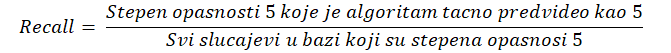
### Treca kolona 'Precision' : Za razliku od 'Recall', 'Precision' bi na prethodnom primeru predstavljalo - Od svih predvidjanja koja je algoritam napravio za klasu stepen opasnosti 5 koji deo je stvarno klase 5. 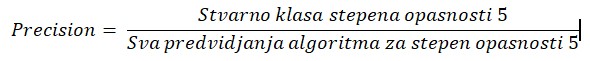

### Cetvrta kolona 'ROC_AUC' : objasnjenje se nalazi 
### Peta kolona 'F1_Score' : 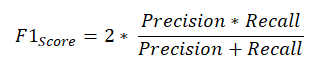

<a name='4.'></a>
# 4. Random Forest: najbolje se pokazao na nase podatke

### Tuning Hyperparameters : podesavanje parametara random forest modela kako bi unapredILI njegove performanse### Tuning Hyperparameters 

In [303]:
random_forest = RandomForestClassifier()

random_forest.fit(X_train, y_train)

y_test_pred = random_forest.predict(X_test)

RandomForestClassifier()

In [64]:
from sklearn.model_selection import RandomizedSearchCV

# Random grid
random_grid = {'bootstrap': [True, False],
               'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

# Use the random grid to search for best hyperparameters
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available

rf_random = RandomizedSearchCV(estimator = random_forest, param_distributions = random_grid, 
                                n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [65]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 90,
 'bootstrap': False}

In [304]:
konacni_rezultati = get_stats(RandomForestClassifier(n_estimators = 400,
                                                     min_samples_split = 2,
                                                     min_samples_leaf = 1,
                                                     max_features = 'sqrt',
                                                     max_depth = 90,
                                                     bootstrap = False,
                                                     random_state=42))

In [305]:
konacni_rezultati

,Accuracy,Recall,Precision,ROC_AUC,F1_Score
0,0.98,0.97,0.95,1.0,0.96


## ^^^ Rezultati dobijeni istrazivanjem parametara modela ^^^

In [306]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 400,
                                min_samples_split = 2,
                                min_samples_leaf = 1,
                                max_features = 'sqrt',
                                max_depth = 90,
                                bootstrap = False,
                                random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=90, max_features='sqrt',
                       n_estimators=400, random_state=42)

In [307]:
import pickle

pickle_out = open('RandomForest_15_5_2022.pkl', 'wb')
pickle.dump(model, pickle_out)
pickle_out.close()

In [308]:
model.predict_proba(X_test[:1])

array([[0., 1., 0., 0., 0.]])

<a name='5.'></a>
# 5. Vizuelni prikaz rezultata na ROCAUC grafiku i Confusion matrix

(-0.05, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver operating characteristic for multi-class data')

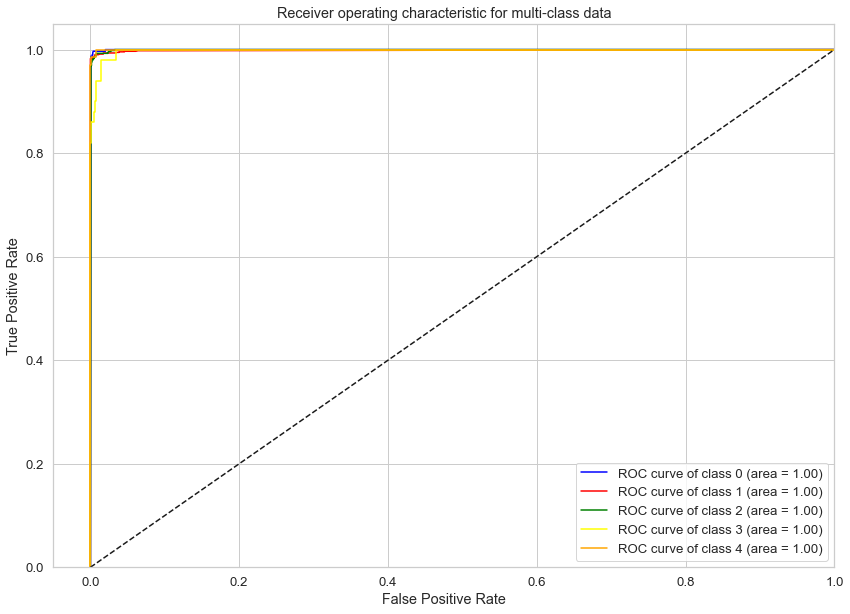

In [312]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, plot_confusion_matrix

y_score = model.predict_proba(X_test)
n_classes = 5

y=pd.get_dummies(y_test)
y=y.to_numpy()

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = ['blue', 'red', 'green', 'yellow', 'orange']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

<a name='5-1.'></a>
# 5.1 ^^^ ROC_AUC grafik ^^^
### ROC - Reciver Operating Caracteristic
### AUC - Area Under the Curve
### Na Y osi se nalazi True Positive Rate sto je isto sto i Recall, a na X osi False Positive Rate = Koji deo svih podataka koji nisu klase stepen opasnosti 5, model NETACNO predvidja kao klasu 5 (Ovo radi za svaku klasu pojedinacno). Dakle koji deo podataka je model pogresno predvideo kao klasu stepen opasnosti 5 u odnosu na sve podatke koji nisu klase 5.
### Sto je kriva na grafiku bliza gornjem levom uglu to je model bolji, dobro je sto se nase krive skoro uopste ne vide :) !
### ROC_AUC bodovanje u nasoj tabeli oznacava povrsinu ispod nasih kriva, sto je blize 1 to je bolje!
------------------------------------------------------------------------------------------------------------------------------

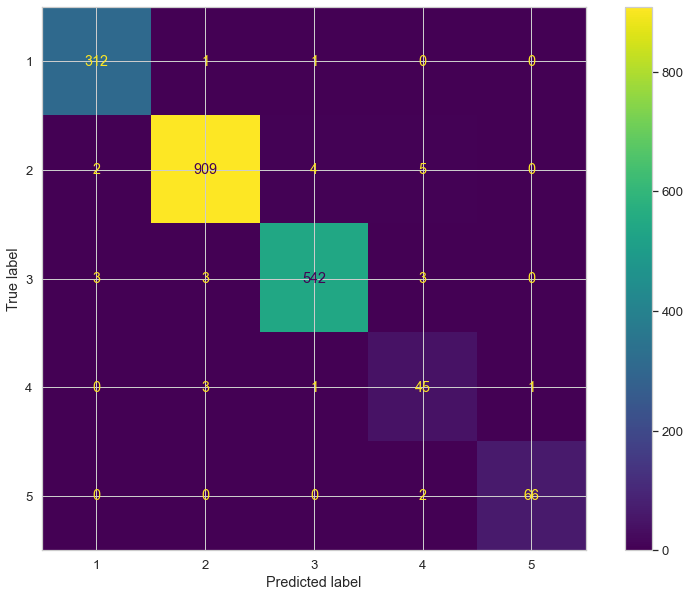

In [318]:
plot_confusion_matrix(model, X_test, y_test)
plt.show()

<a name='5-2.'></a>
# 5.2 ^^^Confusion matrix^^^